In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('cleaned_df.csv')


C:\Users\vacha\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df.head()

,Date,Open,High,Low,Close,Adj_Close,Volume,Daily_Returns,Moving_Average,Rolling_Std,...,Volume_EMA_20,Bid_Ask_Spread_20,Month,DayOfWeek,Monthly_Mean_Close_5,DayOfWeek_Mean_Close_5,Monthly_Mean_Close_10,DayOfWeek_Mean_Close_10,Monthly_Mean_Close_20,DayOfWeek_Mean_Close_20
0,2014-05-28,63.389999,64.139999,62.619999,63.509998,63.442684,47795000,0.000473,63.198,0.382501,...,3.995660e+07,1.323,5,2,210.499759,197.386722,210.499759,197.386722,210.499759,197.386722
1,2014-05-29,63.840000,64.300003,63.509998,63.830002,63.762348,42700000,0.005039,63.198,0.382501,...,3.995660e+07,1.323,5,3,210.499759,197.070257,210.499759,197.070257,210.499759,197.070257
2,2014-05-30,63.950001,64.169998,62.560001,63.299999,63.232906,45253500,-0.008303,63.198,0.382501,...,3.995660e+07,1.323,5,4,210.499759,195.868173,210.499759,195.868173,210.499759,195.868173
3,2014-06-02,63.230000,63.590000,62.049999,63.080002,63.013145,35996000,-0.003475,63.198,0.382501,...,3.995660e+07,1.323,6,0,182.694853,195.993118,182.694853,195.993118,182.694853,195.993118
4,2014-06-03,62.619999,63.419998,62.320000,62.869999,62.803364,32217000,-0.003329,63.198,0.382501,...,3.995660e+07,1.323,6,1,182.694853,196.732817,182.694853,196.732817,182.694853,196.732817


In [25]:
df['Date'] = pd.to_datetime(df['Date'])
# Set date column as the index
df.set_index('Date', inplace=True)
print(df.head())

                 Open       High        Low      Close  Adj_Close    Volume  \
Date                                                                          
2014-05-28  63.389999  64.139999  62.619999  63.509998  63.442684  47795000   
2014-05-29  63.840000  64.300003  63.509998  63.830002  63.762348  42700000   
2014-05-30  63.950001  64.169998  62.560001  63.299999  63.232906  45253500   
2014-06-02  63.230000  63.590000  62.049999  63.080002  63.013145  35996000   
2014-06-03  62.619999  63.419998  62.320000  62.869999  62.803364  32217000   

            Daily_Returns  Moving_Average  Rolling_Std  Close_lag_1  ...  \
Date                                                                 ...   
2014-05-28       0.000473          63.198     0.382501    63.509998  ...   
2014-05-29       0.005039          63.198     0.382501    63.509998  ...   
2014-05-30      -0.008303          63.198     0.382501    63.830002  ...   
2014-06-02      -0.003475          63.198     0.382501    63.29999

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')


In [6]:
# We'll use the 'Close' column for the ARIMA model
data = df['Close']


In [12]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Optionally, you can create train_df and test_df dataframes if needed
train_df = df[:train_size]
test_df = df[train_size:]


In [8]:
# Print the shapes of the training and testing sets
print(f"Training set shape: {train_df.shape}")
print(f"Testing set shape: {test_df.shape}")


Training set shape: (1901, 63)
Testing set shape: (476, 63)


In [9]:
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    return result[1]

# Perform ADF test
p_value = adf_test(train)
if p_value > 0.05:
    print("Series is not stationary. Differencing is needed.")
else:
    print("Series is stationary.")


ADF Statistic: -1.588721651443332
p-value: 0.48925650160434425
Critical Values:
	1%: -3.4338018559735044
	5%: -2.8630647986672106
	10%: -2.5675817452604606
Series is not stationary. Differencing is needed.


In [10]:
# Differencing to make the series stationary
train_diff = train.diff().dropna()


In [11]:
# Perform ADF test again on differenced training data
result_diff = adfuller(train_df['Close'].dropna())
print(f'ADF Statistic after differencing: {result_diff[0]}')
print(f'p-value after differencing: {result_diff[1]}')

ADF Statistic after differencing: -1.588721651443332
p-value after differencing: 0.48925650160434425


<Figure size 720x432 with 0 Axes>

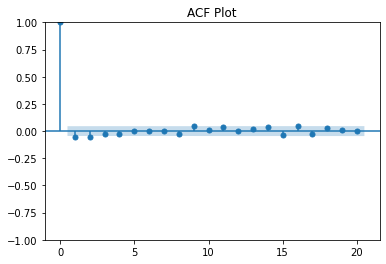

<Figure size 720x432 with 0 Axes>

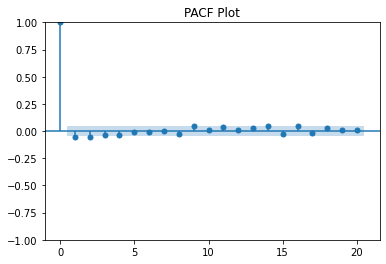

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF plot
plt.figure(figsize=(10, 6))
plot_acf(train_diff, lags=20)
plt.title('ACF Plot')
plt.show()

# PACF plot
plt.figure(figsize=(10, 6))
plot_pacf(train_diff, lags=20)
plt.title('PACF Plot')
plt.show()


In [13]:
# Define the order of the model
p = 1  # This is an example value; you should determine it based on ACF and PACF plots
d = 1  # Based on the differencing done above
q = 1  # This is an example value; you should determine it based on ACF and PACF plots

# Fit the ARIMA model
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1901
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5634.633
Date:                Fri, 28 Jun 2024   AIC                          11275.265
Time:                        22:07:41   BIC                          11291.914
Sample:                             0   HQIC                         11281.394
                               - 1901                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5760      0.110      5.226      0.000       0.360       0.792
ma.L1         -0.6482      0.103     -6.303      0.000      -0.850      -0.447
sigma2        22.0498      0.133    165.454      0.0

Mean Squared Error (MSE): 19140.703341070966
Mean Absolute Error (MAE): 106.67970323517373
Root Mean Squared Error (RMS): 138.34993075918385


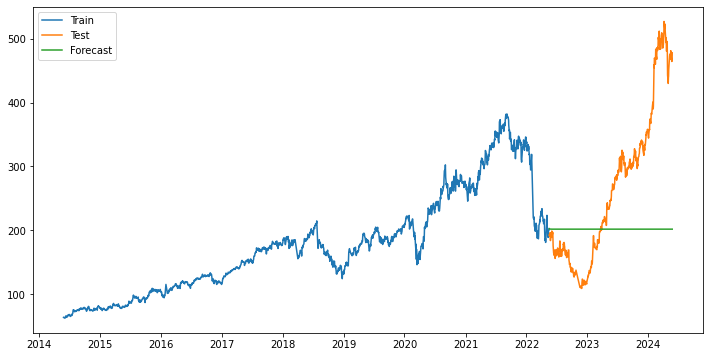

In [14]:
# Import necessary metrics from sklearn
from sklearn.metrics import mean_absolute_error

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Evaluate the model
mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)
rms = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMS): {rms}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()


In [15]:
window_size = 60  # Define the size of the rolling window
rolling_forecasts = []

# Roll over the data in the specified window size
for i in range(len(test) - window_size + 1):
    train_window = data[train_size + i: train_size + i + window_size]
    
    # Check stationarity and differencing if needed
    p_value = adf_test(train_window)
    if p_value > 0.05:
        train_window_diff = train_window.diff().dropna()
    else:
        train_window_diff = train_window
    
    # Fit the ARIMA model
    model = ARIMA(train_window, order=(p, d, q))
    model_fit = model.fit()
    
    # Forecast the next value
    forecast = model_fit.forecast(steps=1)
    rolling_forecasts.append(forecast.values[0])

# Convert the rolling forecasts to a pandas series
rolling_forecasts = pd.Series(rolling_forecasts, index=test.index[window_size-1:])


ADF Statistic: -2.228539439533482
p-value: 0.19605079516868745
Critical Values:
	1%: -3.5463945337644063
	5%: -2.911939409384601
	10%: -2.5936515282964665
ADF Statistic: -2.446910323103311
p-value: 0.12893150329463826
Critical Values:
	1%: -3.5506699942762414
	5%: -2.913766394626147
	10%: -2.5946240473991997
ADF Statistic: -2.038781280092959
p-value: 0.2698318762560414
Critical Values:
	1%: -3.5506699942762414
	5%: -2.913766394626147
	10%: -2.5946240473991997
ADF Statistic: -3.523251597765099
p-value: 0.00740964192098478
Critical Values:
	1%: -3.568485864
	5%: -2.92135992
	10%: -2.5986616
ADF Statistic: -4.940003451512461
p-value: 2.913240097325077e-05
Critical Values:
	1%: -3.568485864
	5%: -2.92135992
	10%: -2.5986616
ADF Statistic: -2.436247237944237
p-value: 0.1317660933280413
Critical Values:
	1%: -3.5463945337644063
	5%: -2.911939409384601
	10%: -2.5936515282964665
ADF Statistic: -2.616902383470821
p-value: 0.08955396477697042
Critical Values:
	1%: -3.5463945337644063
	5%: -2.911

ADF Statistic: -1.047300110038079
p-value: 0.735624350654404
Critical Values:
	1%: -3.5463945337644063
	5%: -2.911939409384601
	10%: -2.5936515282964665
ADF Statistic: -1.5402600207910473
p-value: 0.5135096772637062
Critical Values:
	1%: -3.5463945337644063
	5%: -2.911939409384601
	10%: -2.5936515282964665
ADF Statistic: -1.6594274612744702
p-value: 0.4521284827186153
Critical Values:
	1%: -3.5463945337644063
	5%: -2.911939409384601
	10%: -2.5936515282964665
ADF Statistic: -1.621622494097423
p-value: 0.4718787889694914
Critical Values:
	1%: -3.5463945337644063
	5%: -2.911939409384601
	10%: -2.5936515282964665
ADF Statistic: -1.6864338002192103
p-value: 0.43811539641860864
Critical Values:
	1%: -3.5463945337644063
	5%: -2.911939409384601
	10%: -2.5936515282964665
ADF Statistic: -1.2344031805405902
p-value: 0.6586240717341935
Critical Values:
	1%: -3.5463945337644063
	5%: -2.911939409384601
	10%: -2.5936515282964665
ADF Statistic: -1.1051523039903235
p-value: 0.7130128581678101
Critical 

ADF Statistic: -0.3231999375515387
p-value: 0.9221536502308709
Critical Values:
	1%: -3.5506699942762414
	5%: -2.913766394626147
	10%: -2.5946240473991997
ADF Statistic: -0.36935688636897845
p-value: 0.9150907331824605
Critical Values:
	1%: -3.5506699942762414
	5%: -2.913766394626147
	10%: -2.5946240473991997
ADF Statistic: -0.5289286949912038
p-value: 0.8862465621963629
Critical Values:
	1%: -3.5506699942762414
	5%: -2.913766394626147
	10%: -2.5946240473991997
ADF Statistic: -0.6642985538830403
p-value: 0.8557816017629414
Critical Values:
	1%: -3.5506699942762414
	5%: -2.913766394626147
	10%: -2.5946240473991997
ADF Statistic: -0.551321745932274
p-value: 0.8816064037097361
Critical Values:
	1%: -3.5506699942762414
	5%: -2.913766394626147
	10%: -2.5946240473991997
ADF Statistic: -0.5040629633568741
p-value: 0.8912211947952173
Critical Values:
	1%: -3.5506699942762414
	5%: -2.913766394626147
	10%: -2.5946240473991997
ADF Statistic: -0.44104387231497577
p-value: 0.9030170948501364
Critic

ADF Statistic: -0.7113180142272315
p-value: 0.8437960955037697
Critical Values:
	1%: -3.5463945337644063
	5%: -2.911939409384601
	10%: -2.5936515282964665
ADF Statistic: -0.5879065749140114
p-value: 0.8736912973352084
Critical Values:
	1%: -3.5463945337644063
	5%: -2.911939409384601
	10%: -2.5936515282964665
ADF Statistic: -0.7199294916390069
p-value: 0.841519597025231
Critical Values:
	1%: -3.5463945337644063
	5%: -2.911939409384601
	10%: -2.5936515282964665
ADF Statistic: -0.8140901257852182
p-value: 0.814948122193752
Critical Values:
	1%: -3.5463945337644063
	5%: -2.911939409384601
	10%: -2.5936515282964665
ADF Statistic: -0.712798542185234
p-value: 0.8434065163527522
Critical Values:
	1%: -3.5463945337644063
	5%: -2.911939409384601
	10%: -2.5936515282964665
ADF Statistic: -0.8978515960497119
p-value: 0.7886790945490063
Critical Values:
	1%: -3.5463945337644063
	5%: -2.911939409384601
	10%: -2.5936515282964665
ADF Statistic: -0.9352120055748526
p-value: 0.7761555976265134
Critical V

ADF Statistic: -1.6293876665057467
p-value: 0.4678112493826394
Critical Values:
	1%: -3.568485864
	5%: -2.92135992
	10%: -2.5986616
ADF Statistic: -1.1339076384515048
p-value: 0.70136231028061
Critical Values:
	1%: -3.5463945337644063
	5%: -2.911939409384601
	10%: -2.5936515282964665
ADF Statistic: -1.2950551112639488
p-value: 0.6314315587983869
Critical Values:
	1%: -3.5463945337644063
	5%: -2.911939409384601
	10%: -2.5936515282964665
ADF Statistic: -1.939981690109965
p-value: 0.3134924023335402
Critical Values:
	1%: -3.568485864
	5%: -2.92135992
	10%: -2.5986616
ADF Statistic: -2.1160392049094487
p-value: 0.23811425659769903
Critical Values:
	1%: -3.568485864
	5%: -2.92135992
	10%: -2.5986616
ADF Statistic: -2.370327191100633
p-value: 0.1502870481091046
Critical Values:
	1%: -3.568485864
	5%: -2.92135992
	10%: -2.5986616
ADF Statistic: -2.3031858933077554
p-value: 0.17094251627970009
Critical Values:
	1%: -3.568485864
	5%: -2.92135992
	10%: -2.5986616
ADF Statistic: -1.84770712811974

ADF Statistic: -2.2464980203597515
p-value: 0.18980401494645138
Critical Values:
	1%: -3.5463945337644063
	5%: -2.911939409384601
	10%: -2.5936515282964665
ADF Statistic: -2.3971618425437806
p-value: 0.14253906054108906
Critical Values:
	1%: -3.5463945337644063
	5%: -2.911939409384601
	10%: -2.5936515282964665
ADF Statistic: -2.0681648950843
p-value: 0.2575067756695878
Critical Values:
	1%: -3.5463945337644063
	5%: -2.911939409384601
	10%: -2.5936515282964665
ADF Statistic: -2.2883674445319
p-value: 0.1757471534597957
Critical Values:
	1%: -3.5463945337644063
	5%: -2.911939409384601
	10%: -2.5936515282964665
ADF Statistic: -2.151964093669004
p-value: 0.224139041319873
Critical Values:
	1%: -3.5463945337644063
	5%: -2.911939409384601
	10%: -2.5936515282964665
ADF Statistic: -2.11144581252244
p-value: 0.2399371597556123
Critical Values:
	1%: -3.5463945337644063
	5%: -2.911939409384601
	10%: -2.5936515282964665
ADF Statistic: -2.154309714223762
p-value: 0.22324408450848765
Critical Values

ADF Statistic: -0.5654855405740489
p-value: 0.8785917373307981
Critical Values:
	1%: -3.5463945337644063
	5%: -2.911939409384601
	10%: -2.5936515282964665
ADF Statistic: -0.64774703032745
p-value: 0.8598241540932146
Critical Values:
	1%: -3.5463945337644063
	5%: -2.911939409384601
	10%: -2.5936515282964665
ADF Statistic: -0.20973645373330557
p-value: 0.9373510631557523
Critical Values:
	1%: -3.5463945337644063
	5%: -2.911939409384601
	10%: -2.5936515282964665
ADF Statistic: -0.16586932027841464
p-value: 0.9424695013281003
Critical Values:
	1%: -3.5463945337644063
	5%: -2.911939409384601
	10%: -2.5936515282964665
ADF Statistic: 0.08568329044760883
p-value: 0.9650699226317294
Critical Values:
	1%: -3.5463945337644063
	5%: -2.911939409384601
	10%: -2.5936515282964665
ADF Statistic: -0.4622896109530188
p-value: 0.8991677353581695
Critical Values:
	1%: -3.5463945337644063
	5%: -2.911939409384601
	10%: -2.5936515282964665
ADF Statistic: -0.5707259134820357
p-value: 0.8774605281173758
Critica

ADF Statistic: -1.3137252520420122
p-value: 0.6228698353243219
Critical Values:
	1%: -3.5463945337644063
	5%: -2.911939409384601
	10%: -2.5936515282964665
ADF Statistic: -1.6382415680402473
p-value: 0.46317977171414537
Critical Values:
	1%: -3.5463945337644063
	5%: -2.911939409384601
	10%: -2.5936515282964665
ADF Statistic: -1.7436835753734374
p-value: 0.40875744223381616
Critical Values:
	1%: -3.5463945337644063
	5%: -2.911939409384601
	10%: -2.5936515282964665
ADF Statistic: -1.7526909488698232
p-value: 0.4041891436153077
Critical Values:
	1%: -3.5463945337644063
	5%: -2.911939409384601
	10%: -2.5936515282964665
ADF Statistic: -1.668559329264332
p-value: 0.4473800857849739
Critical Values:
	1%: -3.5463945337644063
	5%: -2.911939409384601
	10%: -2.5936515282964665
ADF Statistic: -1.5933063740036784
p-value: 0.4869550689262525
Critical Values:
	1%: -3.5463945337644063
	5%: -2.911939409384601
	10%: -2.5936515282964665
ADF Statistic: -1.5242383416831118
p-value: 0.5214887288306048
Critic

Rolling Mean Squared Error (MSE): 2.1905889209095672
Rolling Mean Absolute Error (MAE): 0.8684482220115876
Rolling Root Mean Squared Error (RMS): 1.4800638232554593


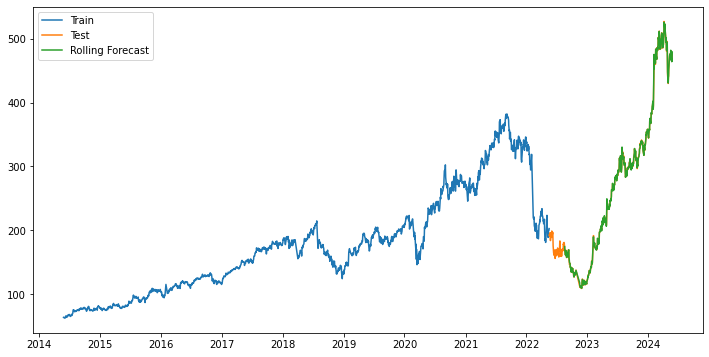

In [16]:
# Evaluate the rolling model
rolling_mse = mean_squared_error(test[window_size-1:], rolling_forecasts)
rolling_mae = mean_absolute_error(test[window_size-1:], rolling_forecasts)
rolling_rms = np.sqrt(rolling_mse)

print(f'Rolling Mean Squared Error (MSE): {rolling_mse}')
print(f'Rolling Mean Absolute Error (MAE): {rolling_mae}')
print(f'Rolling Root Mean Squared Error (RMS): {rolling_rms}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index[window_size-1:], rolling_forecasts, label='Rolling Forecast')
plt.legend()
plt.show()


Combined Mean Squared Error (MSE): 19135.05488278908
Combined Mean Absolute Error (MAE): 106.67038416630477
Combined Root Mean Squared Error (RMS): 138.32951558792172


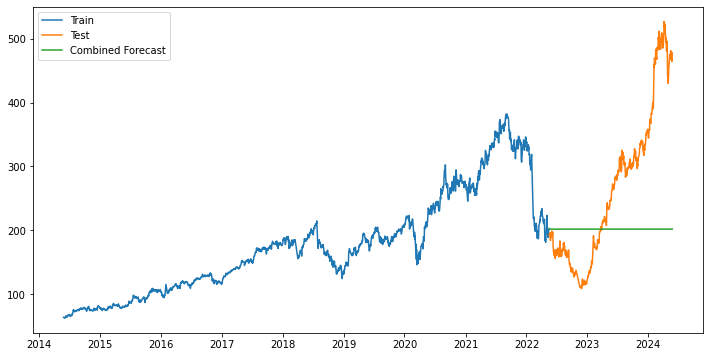

In [17]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Define the order of the model (p, d, q)
p = 2  # This is an example value; you should determine it based on ACF and PACF plots
d = 1  # Based on the differencing done above
q = 1  # This is an example value; you should determine it based on ACF and PACF plots

# Fit the ARIMA model
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

# Apply Exponential Smoothing to the ARIMA residuals
residuals = model_fit.resid
exp_smoothing_model = ExponentialSmoothing(residuals).fit()

# Forecast using ARIMA and Exponential Smoothing
arima_forecast = model_fit.forecast(steps=len(test))
exp_smoothing_forecast = exp_smoothing_model.forecast(steps=len(test))

# Combine ARIMA and Exponential Smoothing forecasts
combined_forecast = arima_forecast + exp_smoothing_forecast

# Evaluate the combined model
combined_mse = mean_squared_error(test, combined_forecast)
combined_mae = mean_absolute_error(test, combined_forecast)
combined_rms = np.sqrt(combined_mse)

print(f'Combined Mean Squared Error (MSE): {combined_mse}')
print(f'Combined Mean Absolute Error (MAE): {combined_mae}')
print(f'Combined Root Mean Squared Error (RMS): {combined_rms}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, combined_forecast, label='Combined Forecast')
plt.legend()
plt.show()


Rolling Mean Squared Error (MSE): 49.957449717587636
Rolling Mean Absolute Error (MAE): 1.3988926353117928
Rolling Root Mean Squared Error (RMS): 7.068058412151645


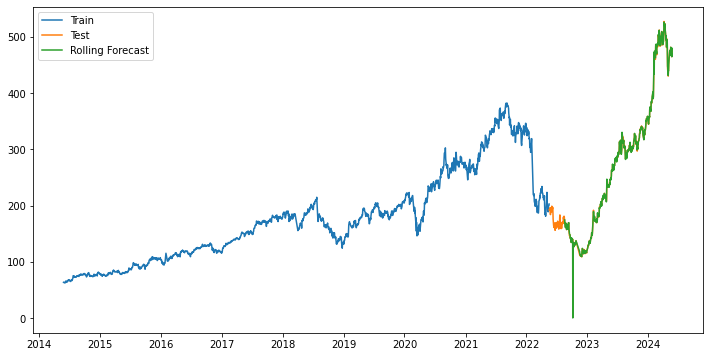

In [18]:


# ADF test function
def adf_test(series):
    result = adfuller(series)
    return result[1]

# Define a rolling window
window_size = 60  # Define the size of the rolling window
rolling_forecasts = []

# Roll over the data in the specified window size
for i in range(len(test) - window_size + 1):
    train_window = data[train_size + i: train_size + i + window_size]
    
    # Check stationarity and differencing if needed
    p_value = adf_test(train_window)
    if p_value > 0.05:
        train_window_diff = train_window.diff().dropna()
    else:
        train_window_diff = train_window
    
    # Fit the ARIMA model
    model = ARIMA(train_window, order=(p, d, q))
    model_fit = model.fit()
    
    # Forecast the next value
    forecast = model_fit.forecast(steps=1)
    rolling_forecasts.append(forecast.values[0])

# Convert the rolling forecasts to a pandas series
rolling_forecasts = pd.Series(rolling_forecasts, index=test.index[window_size-1:])

# Evaluate the rolling model
rolling_mse = mean_squared_error(test[window_size-1:], rolling_forecasts)
rolling_mae = mean_absolute_error(test[window_size-1:], rolling_forecasts)
rolling_rms = np.sqrt(rolling_mse)

print(f'Rolling Mean Squared Error (MSE): {rolling_mse}')
print(f'Rolling Mean Absolute Error (MAE): {rolling_mae}')
print(f'Rolling Root Mean Squared Error (RMS): {rolling_rms}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index[window_size-1:], rolling_forecasts, label='Rolling Forecast')
plt.legend()
plt.show()


Mean Squared Error (MSE): 6.989611616712787e-06
Mean Absolute Error (MAE): 0.002245726825882026
Root Mean Squared Error (RMS): 0.0026437873622348652


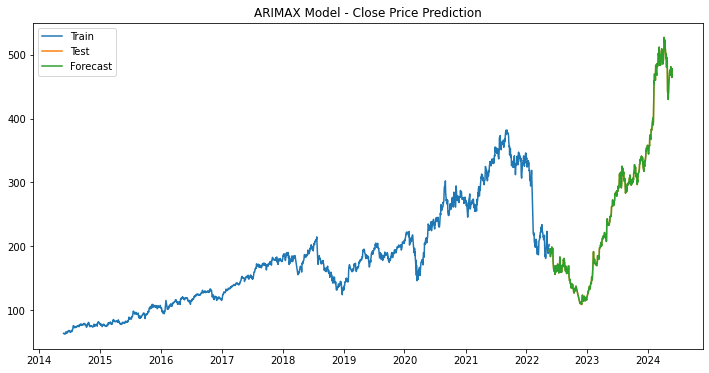

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Ensure 'Date' is in datetime format and set as index
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

# Selected features for the ARIMAX model
features = [
    'Close_lag_1', 'Close_lag_2', 'Close_lag_3', 'Close_lag_4', 'Close_lag_5', 
    'Close_lag_6', 'Close_lag_7', 'Close_lag_8', 'Close_lag_9', 'Close_lag_10',
    'Close_mean_5', 'Close_std_5', 'Volume_SMA_5', 'Volume_EMA_5',
    'Close_mean_10', 'Close_std_10', 'Volume_SMA_10', 'Volume_EMA_10',
    'Close_mean_20', 'Close_std_20', 'Volume_SMA_20', 'Volume_EMA_20',
    'RSI', 'MACD', 'Bollinger_Bands',
    'Bid_Ask_Spread_5', 'Bid_Ask_Spread_10', 'Bid_Ask_Spread_20',
    'Month', 'DayOfWeek', 'Monthly_Mean_Close', 'DayOfWeek_Mean_Close'
]

# Ensure these features exist in the dataframe
features = [feature for feature in features if feature in df.columns]

# Prepare the data
data = df[['Close'] + features]

# Fill any missing values
data = data.fillna(method='bfill').fillna(method='ffill')

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Extract exogenous variables
train_exog = train[features]
test_exog = test[features]

# Define the order of the ARIMA model
p, d, q = 1, 1, 1

# Fit the ARIMAX model
model = SARIMAX(train['Close'], exog=train_exog, order=(p, d, q))
model_fit = model.fit(disp=False)

# Make predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, exog=test_exog)

# Evaluate the model
mse = mean_squared_error(test['Close'], predictions)
mae = mean_absolute_error(test['Close'], predictions)
rms = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMS): {rms}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(test.index, predictions, label='Forecast')
plt.legend()
plt.title('ARIMAX Model - Close Price Prediction')
plt.show()


Mean Squared Error (MSE): 3.1679223760072346e-05
Mean Absolute Error (MAE): 0.005298726212985945
Root Mean Squared Error (RMS): 0.005628429955153777


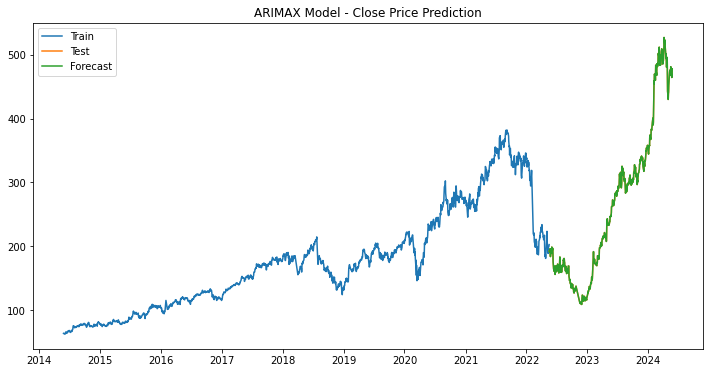

In [4]:
# Define the order of the ARIMA model
p, d, q = 2, 1, 1

# Fit the ARIMAX model
model = SARIMAX(train['Close'], exog=train_exog, order=(p, d, q))
model_fit = model.fit(disp=False)

# Make predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, exog=test_exog)

# Evaluate the model
mse = mean_squared_error(test['Close'], predictions)
mae = mean_absolute_error(test['Close'], predictions)
rms = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMS): {rms}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(test.index, predictions, label='Forecast')
plt.legend()
plt.title('ARIMAX Model - Close Price Prediction')
plt.show()


Mean Squared Error (MSE): 6.713540449360756e-06
Mean Absolute Error (MAE): 0.0021928777418972955
Root Mean Squared Error (RMS): 0.0025910500669343996


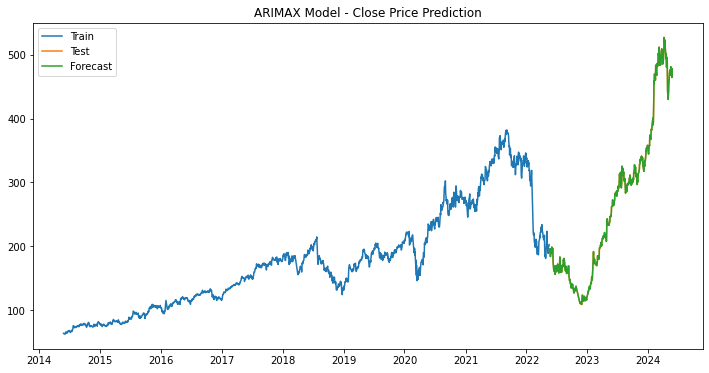

In [5]:
# Define the order of the ARIMA model
p, d, q = 2, 1, 2

# Fit the ARIMAX model
model = SARIMAX(train['Close'], exog=train_exog, order=(p, d, q))
model_fit = model.fit(disp=False)

# Make predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, exog=test_exog)

# Evaluate the model
mse = mean_squared_error(test['Close'], predictions)
mae = mean_absolute_error(test['Close'], predictions)
rms = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMS): {rms}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(test.index, predictions, label='Forecast')
plt.legend()
plt.title('ARIMAX Model - Close Price Prediction')
plt.show()


In [7]:
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Perform grid search
best_aic = np.inf
best_params = None

for param in pdq:
    try:
        model = SARIMAX(train['Close'], exog=train_exog, order=param)
        model_fit = model.fit(disp=False)
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_params = param
    except:
        continue

print(f'Best ARIMA parameters: {best_params}')


Best ARIMA parameters: (1, 1, 0)


In [8]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
mse_scores = []
mae_scores = []
rms_scores = []

for train_index, test_index in tscv.split(data):
    train, test = data.iloc[train_index], data.iloc[test_index]
    train_exog, test_exog = train[features], test[features]

    model = SARIMAX(train['Close'], exog=train_exog, order=best_params)
    model_fit = model.fit(disp=False)
    predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, exog=test_exog)

    mse = mean_squared_error(test['Close'], predictions)
    mae = mean_absolute_error(test['Close'], predictions)
    rms = np.sqrt(mse)

    mse_scores.append(mse)
    mae_scores.append(mae)
    rms_scores.append(rms)

print(f'Cross-Validated MSE: {np.mean(mse_scores)}')
print(f'Cross-Validated MAE: {np.mean(mae_scores)}')
print(f'Cross-Validated RMS: {np.mean(rms_scores)}')


Cross-Validated MSE: 0.00028130809752692276
Cross-Validated MAE: 0.010195276058380944
Cross-Validated RMS: 0.011655879907680494


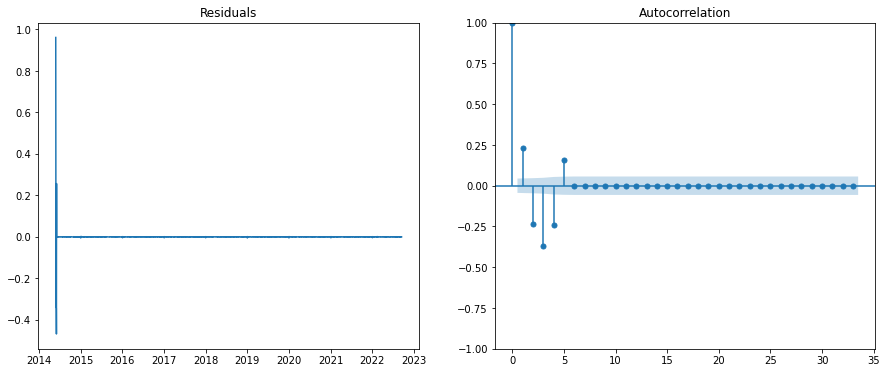

In [9]:
import statsmodels.api as sm

# Plot residuals
residuals = model_fit.resid
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].plot(residuals)
ax[0].set_title('Residuals')
sm.graphics.tsa.plot_acf(residuals, ax=ax[1])
plt.show()


In [10]:
# Extend the forecast
future_exog = df[features].iloc[-len(test):]
future_predictions = model_fit.predict(start=len(data), end=len(data) + len(test) - 1, exog=future_exog)

# Plot the extended forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Historical')
plt.plot(future_predictions, label='Extended Forecast')
plt.legend()
plt.title('ARIMAX Model - Extended Forecast')
plt.show()


ValueError: Provided exogenous values are not of the appropriate shape. Required (792, 27), got (396, 27).

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Define SARIMA configuration
order = (1, 1, 1)  # (p, d, q)
seasonal_order = (1, 1, 1, 12)  # (P, D, Q, s)

# Fit SARIMA model
sarima_model = SARIMAX(train_df['Close'], order=order, seasonal_order=seasonal_order)
sarima_fit = sarima_model.fit(disp=False)

# Make predictions
sarima_forecast = sarima_fit.predict(start=len(train_df), end=len(train_df) + len(test_df) - 1, typ='levels')
test_df['SARIMA_Forecast'] = sarima_forecast

# Evaluate the model
mse_sarima = mean_squared_error(test_df['Close'], test_df['SARIMA_Forecast'])
mae_sarima = mean_absolute_error(test_df['Close'], test_df['SARIMA_Forecast'])
rms_sarima = np.sqrt(mse_sarima)

print(f"SARIMA Mean Squared Error (MSE): {mse_sarima}")
print(f"SARIMA Mean Absolute Error (MAE): {mae_sarima}")
print(f"SARIMA Root Mean Squared Error (RMS): {rms_sarima}")

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(train_df['Close'], label='Train')
plt.plot(test_df['Close'], label='Test')
plt.plot(test_df['SARIMA_Forecast'], label='SARIMA Forecast')
plt.legend()
plt.show()


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').